In [1]:
from wordcloud import *
import numpy as np
from matplotlib import pyplot as plt
from collections import *
from PIL import Image

In [2]:
#dir(wordcloud.STOPWORDS)
#dir(wordcloud.WordCloud())
uninteresting_words = ["the", 'in', "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
"we", "our", "ours", "you", "your", "yours", "he", "she", "him", "his", "her", "hers", "its", "they", "them", \
"their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
"have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how", \
"all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just"]
sw=set(STOPWORDS).union(set(uninteresting_words))


In [3]:
#convert txt to str
file = open("D:\\bkt\\planet.txt")
file_contents = file.read().replace("\n", " ")
file.close()

In [5]:
#for mask image
m= np.array(Image.open('D:\\pics\\Mask\\mask.png'))

In [6]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''   
    # remove punctuations| create dictionary| remove uninteresting words
    
    n = ""
    for char in file_contents:
        if char not in punctuations:
            n+=char
    dictionary=dict(Counter(n.lower().split()))
    for key in sw:
        if key in dictionary:
            dictionary.pop(key)
        
    #wordcloud
    cloud = WordCloud(background_color='white', mask=m, stopwords=sw, max_words=100, min_font_size=10, max_font_size=200, width=1000, height=1500)
    cloud.generate_from_frequencies(dictionary)
    return cloud.to_array()

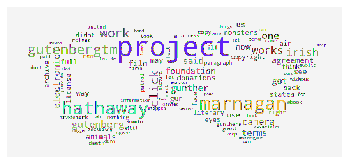

In [7]:
# Display your wordcloud image

myimage = calculate_frequencies(file_contents)
plt.imshow(myimage*12, interpolation = 'nearest')
plt.axis('off')
plt.show()

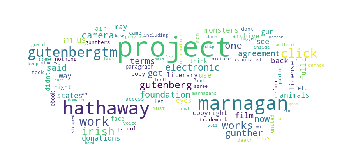

In [8]:
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()